In [2]:
import numpy as np
import pandas as pd

In [ ]:
import numpy as np
import pandas as pd
import matplotlib as mlt
import seaborn as sns


In [ ]:
data = pd.read_csv('file.csv', sep = ',')
data['Dates'] = data['Dates'].astype('datetime64')
data.columns = (['Date','CM','DSI','CM_top','CM_bottom','Vol_pos','Vol_neg','Opt_vol','Price'])
data.head()

,Date,CM,DSI,CM_top,CM_bottom,Vol_pos,Vol_neg,Opt_vol,Price
0,2021-04-01,267.569262,39.503498,249.455179,203.658869,1.038873e+07,-5.867719e+06,1.692419e+07,252.960007
1,2021-04-05,266.446103,43.547849,249.455179,203.658869,1.038873e+07,-5.867719e+06,1.745595e+07,259.359985
2,2021-04-06,266.097440,59.864450,271.936465,213.215830,1.671536e+07,-1.343049e+06,2.350778e+07,255.169998
3,2021-04-07,265.693929,60.485745,270.586292,214.080616,1.713731e+07,-1.354932e+06,2.321486e+07,252.580002
4,2021-04-08,262.822885,58.596604,269.124498,215.351014,2.174643e+07,-1.297189e+06,2.108926e+07,254.949997


C:\Users\QWERTY\AppData\Local\Temp\ipykernel_14508\3653473112.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))


<AxesSubplot:>

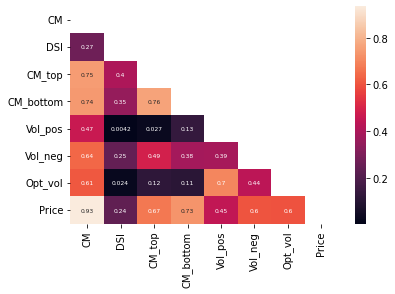

In [ ]:
mask = np.triu(np.ones_like(data.corr(), dtype=np.bool))
sns.heatmap(data.corr(),annot=True, mask = mask, annot_kws={'size':6})

In [ ]:
data = pd.read_csv('file.csv', sep = ',')